In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\survey.csv")

In [3]:
df.head(20)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,27-08-2014 11:31,33,Male,United States,TN,NaN,Yes,No,Sometimes,Jun-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,27-08-2014 11:31,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,01-May,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,27-08-2014 11:32,39,M,Canada,NaN,NaN,No,No,Never,01-May,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,27-08-2014 11:32,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,27-08-2014 11:32,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [4]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
df.shape

(1259, 27)

In [7]:
df.isnull().sum().sort_values(ascending=False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64

### DATA PREPROCESSING

In [8]:
#Dropping Unnessary Features : 'Comments','State' ,'Country' and 'TimeStamp'

df.drop(['comments'], axis= 1, inplace=True)
df.drop(['state'], axis= 1, inplace=True)
df.drop(['Country'], axis= 1, inplace=True)
df.drop(['Timestamp'], axis= 1, inplace=True)



In [9]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [10]:
df['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

<AxesSubplot:>

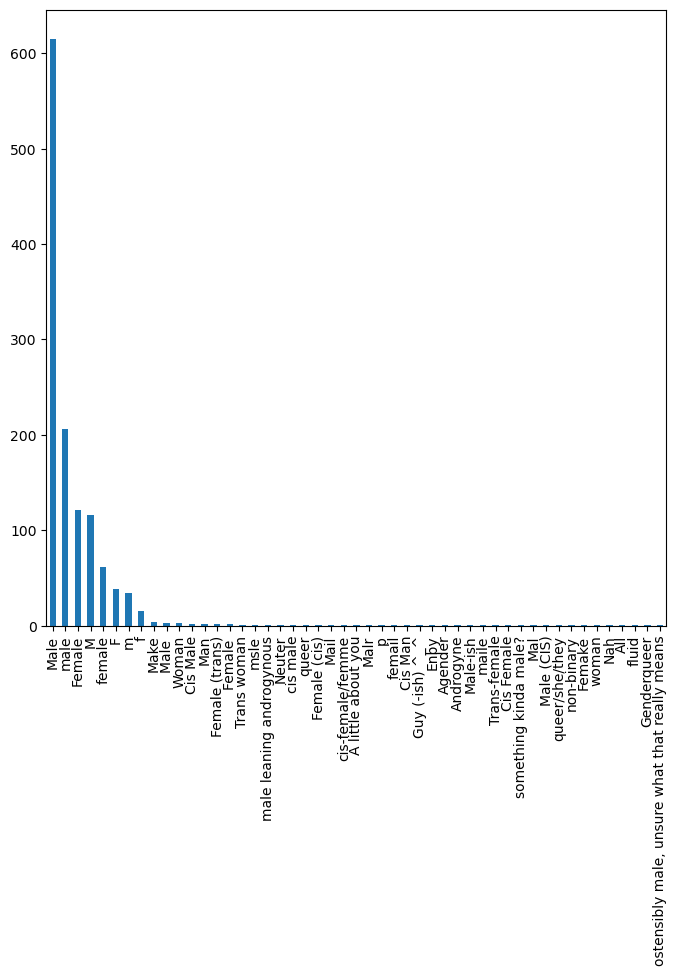

In [11]:
df['Gender'].value_counts().plot(kind = 'bar',figsize=(8,8))

In [12]:
# Getting Rid of Unnecassary Values in Feature 'Gender'

df['Gender'].replace(['male','M','m','Make','Man','Mair','Guy (-ish) ^_^',
                     'male leaning androgynous','Cis Man','msle','cis male','Mail',
                     'Androgyne','Male (CIS)','Male-ish','maile','something kinda male?',
                     'Mal','ostensibly male, unsure what that really means','Malr',
                      'Cis Male','Male '],'Male',inplace=True)

df['Gender'].replace(['female','F','f','Female ','Female (cis)','Femail',
                      'Femake', 'woman','Cis Female','femail','Woman',
                      'cis-female/femme'],'Female',inplace = True)

df['Gender'].replace(['Trans-female','queer/she/they', 'non-binary', 'Nah',
       'All', 'Enby', 'fluid', 'Genderqueer', 'Agender', 'Trans woman',
       'Neuter', 'Female (trans)', 'queer'],'Other',inplace = True)

stk_list = ['A little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

In [13]:
df['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

<AxesSubplot:>

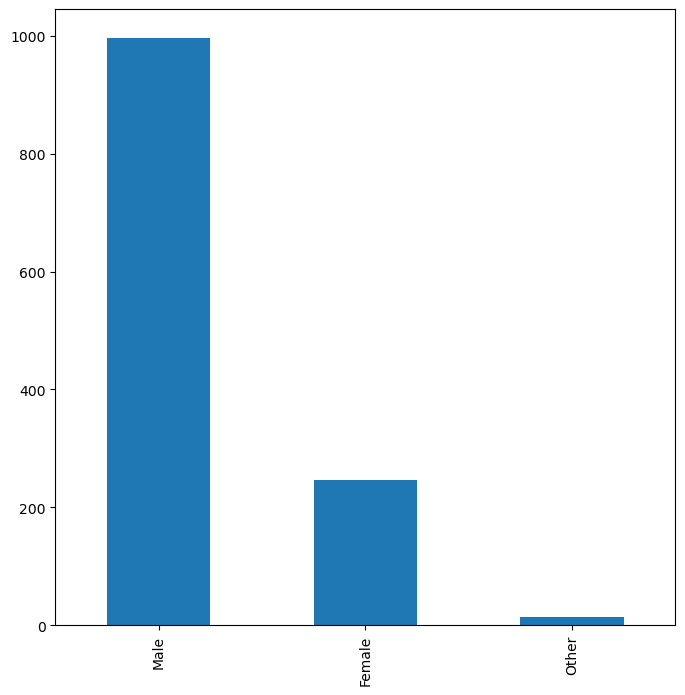

In [14]:
df['Gender'].value_counts().plot(kind = 'bar',figsize=(8,8))

<AxesSubplot:>

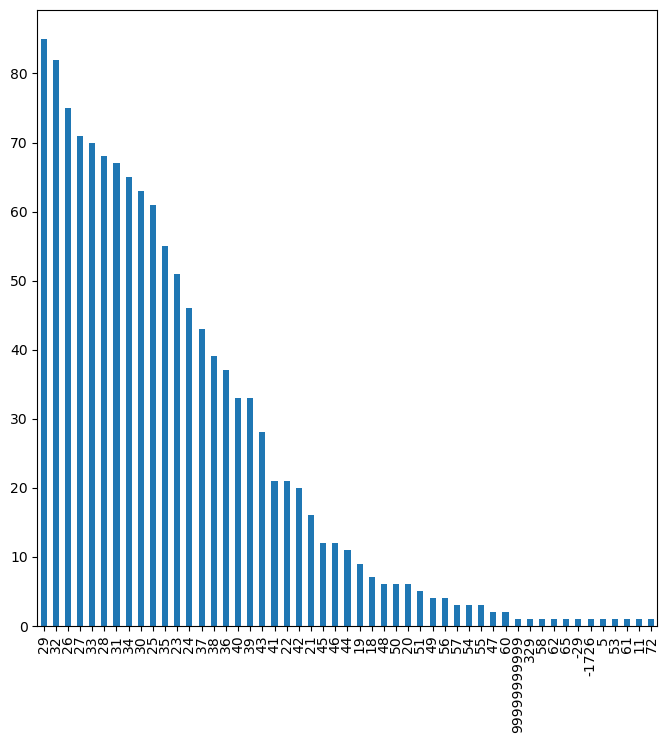

In [15]:
df['Age'].value_counts().plot(kind = 'bar',figsize=(8,8))

In [16]:
df['Age'].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 329             1
 58              1
 62              1
 65              1
-29              1
-1726            1
 5               1
 53              1
 61              1
 11              1
 72              1
Name: Age, dtype: int64

In [17]:
#Range of data

df['Age'].value_counts().sort_index()

-1726            1
-29              1
 5               1
 11              1
 18              7
 19              9
 20              6
 21             16
 22             21
 23             51
 24             46
 25             61
 26             75
 27             71
 28             68
 29             85
 30             63
 31             67
 32             82
 33             70
 34             65
 35             55
 36             37
 37             43
 38             39
 39             33
 40             33
 41             21
 42             20
 43             28
 44             11
 45             12
 46             12
 47              2
 48              6
 49              4
 50              6
 51              5
 53              1
 54              3
 55              3
 56              4
 57              3
 58              1
 60              2
 61              1
 62              1
 65              1
 72              1
 329             1
 99999999999     1
Name: Age, dtype: int64

In [19]:
mean_age = df[(df['Age'] <= 75) & (df['Age'] >= 18)]['Age'].mean()
mean_age= mean_age
mean_age

32.07673860911271

In [20]:
#Fixing Wrong Data in Age Feature 'Age'

df['Age'].replace(99999999999,mean_age,inplace=True)
df['Age'].replace(329,mean_age,inplace=True)
df['Age'].replace(-29,mean_age,inplace=True)

df['Age'].replace(-1726 ,mean_age,inplace=True)
df['Age'].replace(5 ,mean_age,inplace=True)
df['Age'].replace(11 ,mean_age,inplace=True)


df['Age'].value_counts()

29.000000    85
32.000000    82
26.000000    75
27.000000    71
33.000000    70
28.000000    68
31.000000    67
34.000000    65
30.000000    63
25.000000    61
35.000000    55
23.000000    51
24.000000    46
37.000000    43
38.000000    39
36.000000    37
39.000000    33
40.000000    33
43.000000    28
22.000000    21
41.000000    21
42.000000    20
21.000000    16
46.000000    12
45.000000    12
44.000000    11
19.000000     9
18.000000     7
32.076739     6
50.000000     6
48.000000     6
20.000000     6
51.000000     5
56.000000     4
49.000000     4
57.000000     3
55.000000     3
54.000000     3
47.000000     2
60.000000     2
58.000000     1
62.000000     1
65.000000     1
53.000000     1
61.000000     1
72.000000     1
Name: Age, dtype: int64

<AxesSubplot:>

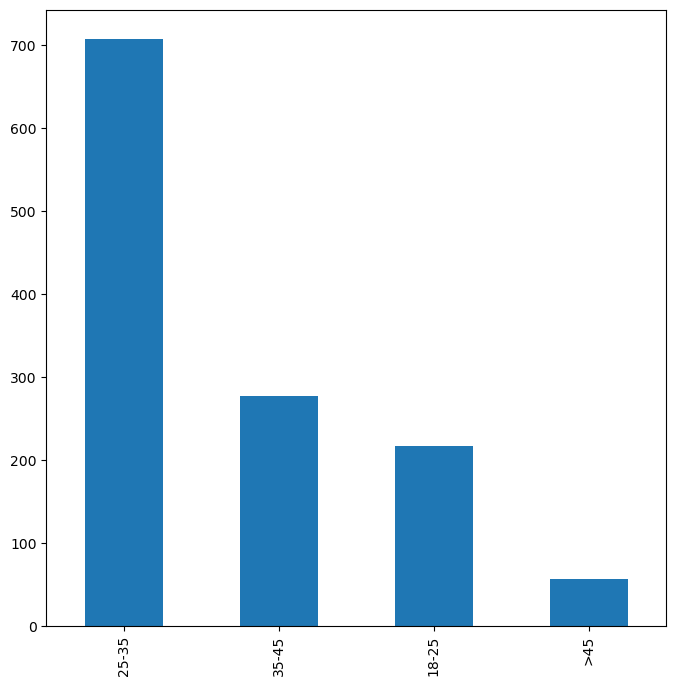

In [21]:

bins = [18,25,35,45,75];
age_cats = ["18-25", "25-35", "35-45", ">45"]
Age_Range = pd.cut(df['Age'], bins, labels= age_cats, include_lowest=True)
Age_Range.value_counts().plot(kind = 'bar',figsize=(8,8))

# Filling Missing Data


In [22]:
df.isnull().sum().sort_values(ascending=False)

work_interfere               264
self_employed                 18
Age                            0
anonymity                      0
mental_vs_physical             0
phys_health_interview          0
mental_health_interview        0
supervisor                     0
coworkers                      0
phys_health_consequence        0
mental_health_consequence      0
leave                          0
wellness_program               0
seek_help                      0
Gender                         0
care_options                   0
benefits                       0
tech_company                   0
remote_work                    0
no_employees                   0
treatment                      0
family_history                 0
obs_consequence                0
dtype: int64

In [23]:
df['self_employed'].value_counts()

No     1095
Yes     144
Name: self_employed, dtype: int64

In [24]:
df['self_employed'].fillna('No',inplace=True)

In [25]:
df['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        142
Name: work_interfere, dtype: int64

In [26]:
df['work_interfere'].fillna('Not Sure',inplace=True)

In [27]:
df['work_interfere'].value_counts()

Sometimes    465
Not Sure     264
Never        213
Rarely       173
Often        142
Name: work_interfere, dtype: int64

In [28]:
df.isnull().sum().sort_values(ascending=False)

Age                          0
seek_help                    0
mental_vs_physical           0
phys_health_interview        0
mental_health_interview      0
supervisor                   0
coworkers                    0
phys_health_consequence      0
mental_health_consequence    0
leave                        0
anonymity                    0
wellness_program             0
Gender                       0
care_options                 0
benefits                     0
tech_company                 0
remote_work                  0
no_employees                 0
work_interfere               0
treatment                    0
family_history               0
self_employed                0
obs_consequence              0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1257 non-null   float64
 1   Gender                     1257 non-null   object 
 2   self_employed              1257 non-null   object 
 3   family_history             1257 non-null   object 
 4   treatment                  1257 non-null   object 
 5   work_interfere             1257 non-null   object 
 6   no_employees               1257 non-null   object 
 7   remote_work                1257 non-null   object 
 8   tech_company               1257 non-null   object 
 9   benefits                   1257 non-null   object 
 10  care_options               1257 non-null   object 
 11  wellness_program           1257 non-null   object 
 12  seek_help                  1257 non-null   object 
 13  anonymity                  1257 non-null   objec

#Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [32]:
df.head(10)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.351852,Female,No,No,Yes,Often,Jun-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,0.481481,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,0.259259,Male,No,No,No,Rarely,Jun-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,0.240741,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,0.240741,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,0.277778,Male,No,Yes,No,Sometimes,Jun-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,0.314815,Female,No,Yes,Yes,Sometimes,01-May,Yes,Yes,No,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,0.388889,Male,No,No,No,Never,01-May,Yes,Yes,No,...,Yes,Don't know,No,No,No,No,No,No,No,No
8,0.444444,Female,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,0.092593,Male,No,No,No,Never,26-100,No,Yes,Don't know,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


# Preprocessing categorical features


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [112]:

X = df.drop('treatment',axis=1)
y=df['treatment']

In [35]:
transformer =  ColumnTransformer([('ordinal_encoder',OrdinalEncoder(),['Gender','self_employed',
                                  'family_history','work_interfere','no_employees','remote_work',
                                  'tech_company' ,'benefits','care_options','wellness_program',
                                  'seek_help','anonymity','leave','mental_health_consequence',
                                  'phys_health_consequence','coworkers','supervisor','mental_health_interview',
                                  'phys_health_interview','mental_vs_physical','obs_consequence'])],remainder='passthrough')

In [36]:
X.shape

(1257, 22)

In [37]:
type(X)

pandas.core.frame.DataFrame

In [38]:
X[:5]

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.351852,Female,No,No,Often,Jun-25,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,0.481481,Male,No,No,Rarely,More than 1000,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,0.259259,Male,No,No,Rarely,Jun-25,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,0.240741,Male,No,Yes,Often,26-100,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,0.240741,Male,No,No,Never,100-500,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [39]:
X = transformer.fit_transform(X)

In [40]:
X

array([[0.        , 0.        , 0.        , ..., 2.        , 0.        ,
        0.35185185],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.48148148],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.25925926],
       ...,
       [1.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.2962963 ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.51851852],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.12962963]])

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder = LabelEncoder();
y = label_encoder.fit_transform(y);

In [43]:
y

array([1, 0, 0, ..., 1, 0, 1])

#Splitting DataSet Into Train/Test Set


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [46]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(879, 22) (378, 22) (879,) (378,)



#**Evaluating Models**



## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [49]:
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score,confusion_matrix,precision_score,recall_score,precision_recall_curve,f1_score
from sklearn.model_selection import cross_val_score,cross_val_predict

###  Accuracy

In [50]:
cross_val_score(log_reg, X_train, y_train, cv=3, scoring='accuracy')

array([0.79522184, 0.80887372, 0.7883959 ])

### Confusion Matrix

In [114]:
y_pred_log = cross_val_predict(log_reg, X_train, y_train, cv=3)
y_pred_log

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [116]:
confusion_matrix_log = confusion_matrix(y_train, y_pred_log)
confusion_matrix_log

array([[348, 101],
       [ 77, 353]], dtype=int64)

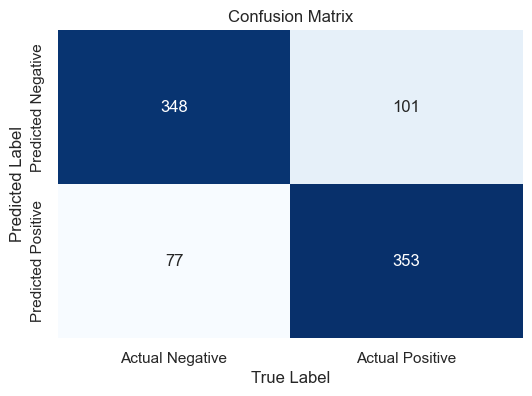

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.0)
sns.heatmap(confusion_matrix_log, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

### Precision/Recall/F1 Score

In [117]:
precision_score(y_train, y_pred_log)

0.7775330396475771

In [118]:
recall_score(y_train, y_pred_log)

0.8209302325581396

In [119]:
f1_score(y_train, y_pred_log)

0.7986425339366515

### Precision-Recall Curve

In [57]:
y_scores = cross_val_predict(log_reg, X_train, y_train, cv=3, method='decision_function')

In [58]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [59]:
print(len(precisions))
print(len(recalls))
print(len(thresholds))

880
880
879


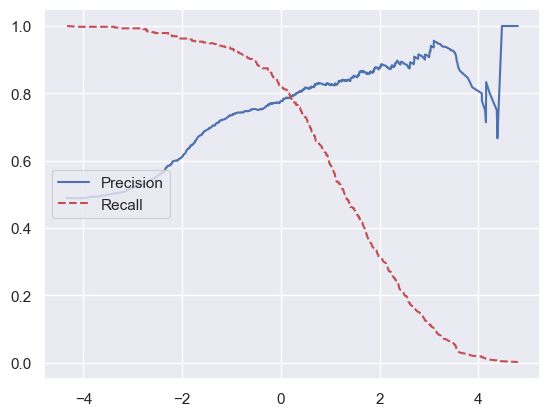

In [60]:
plt.plot(thresholds, precisions[:-1], 'b-', label='Precision')
plt.plot(thresholds, recalls[:-1], 'r--', label='Recall')
plt.legend(loc='center left')
plt.show()

### ROC Curve

In [61]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

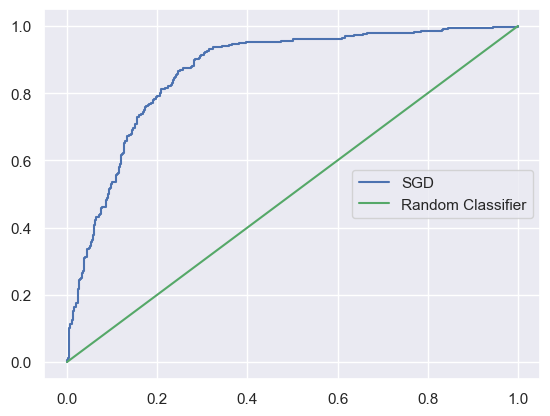

In [62]:
plt.plot(fpr, tpr, 'b-', label='SGD')
plt.plot([0, 1], [0, 1], 'g-', label='Random Classifier')
plt.legend(loc='center right')
plt.show()

In [63]:
roc_auc_score(y_train,  y_scores)

0.8655979696483141

### Prediction Accuracy

In [64]:
y_pred_actual_log_reg = log_reg.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_actual_log_reg)
accuracy

0.7962962962962963

 ### Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

### Accuracy

In [66]:
cross_val_score(decision_tree, X_train, y_train, cv=3, scoring='accuracy')

array([0.7440273 , 0.7337884 , 0.76109215])

### Confusion Matrix

In [67]:
y_pred_dec_tree = cross_val_predict(decision_tree, X_train, y_train, cv=3)

In [68]:
confusion_matrix_dec_tree = confusion_matrix(y_train, y_pred_dec_tree)

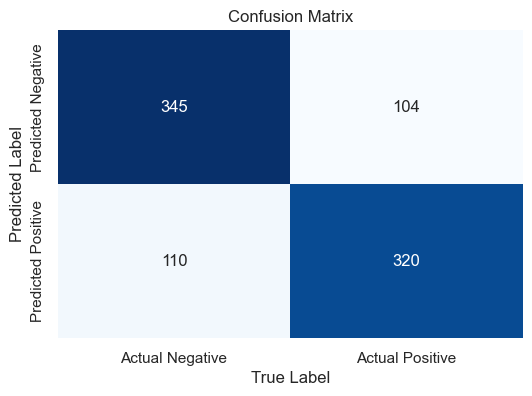

In [69]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.0)
sns.heatmap(confusion_matrix_dec_tree, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

###Precision/Recall/F1 score

In [70]:
precision_score(y_train, y_pred_dec_tree)

0.7547169811320755

In [71]:
recall_score(y_train, y_pred_dec_tree)

0.7441860465116279

In [72]:
f1_score(y_train, y_pred_dec_tree)

0.7494145199063232

###Precision-Recall Curve

In [73]:
y_probas_dec = cross_val_predict(decision_tree, X_train, y_train, cv=3, method='predict_proba')

In [74]:
y_scores_dec = y_probas_dec[:, 1]

In [75]:
precisions_dec, recall_dec, thresholds_dec = precision_recall_curve(y_train, y_scores_dec)

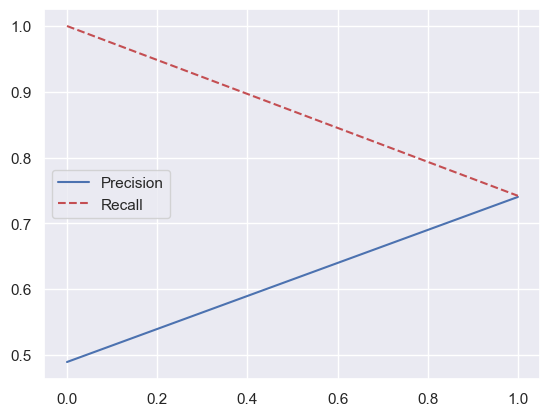

In [76]:
plt.plot(thresholds_dec, precisions_dec[:-1], 'b-', label='Precision')
plt.plot(thresholds_dec, recall_dec[:-1], 'r--', label='Recall')
plt.legend(loc='center left')
plt.show()

### ROC Curve

In [77]:
fpr_dec, tpr_dec, thresholds_dec = roc_curve(y_train, y_scores_dec)

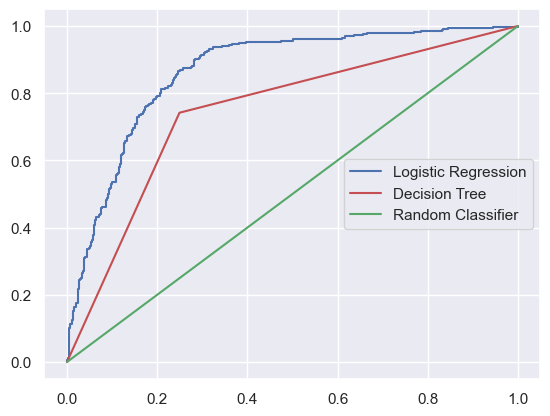

In [78]:
plt.plot(fpr, tpr, 'b-', label='Logistic Regression')
plt.plot(fpr_dec, tpr_dec, 'r-', label='Decision Tree')
plt.plot([0, 1], [0, 1], 'g-', label='Random Classifier')
plt.legend(loc='center right')
plt.show()

In [79]:
roc_auc_score(y_train,  y_scores_dec)

0.7462086289946652

### Prediction Accuracy


In [80]:
y_pred_actual_decision_tree = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_actual_decision_tree)
accuracy

0.7486772486772487

## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rand_for = RandomForestClassifier()
rand_for.fit(X_train, y_train)

RandomForestClassifier()

### Accuracy

In [83]:
cross_val_score(rand_for, X_train, y_train, cv=3, scoring='accuracy')

array([0.79863481, 0.84641638, 0.83959044])

### Confusion Matrix

In [84]:
y_pred_rand_for = cross_val_predict(rand_for, X_train, y_train, cv=3)

In [85]:
confusion_matrix_rand_for = confusion_matrix(y_train, y_pred_dec_tree)

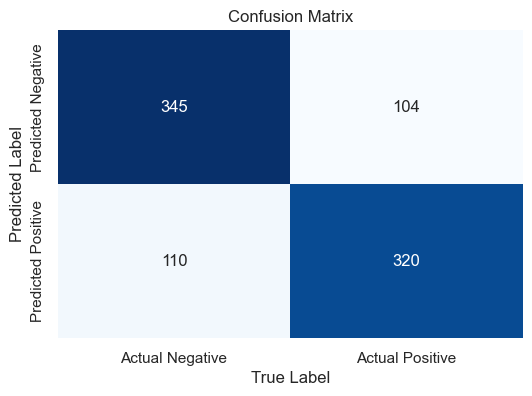

In [86]:
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.0)
sns.heatmap(confusion_matrix_rand_for, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

###Precision/Recall/F1 Score


In [87]:
precision_score(y_train, y_pred_rand_for)

0.7770961145194274

In [88]:
recall_score(y_train, y_pred_rand_for)

0.8837209302325582

In [89]:
f1_score(y_train, y_pred_rand_for)

0.8269858541893363

###Precision-Recall Curve

In [90]:
y_probas = cross_val_predict(rand_for, X_train, y_train, cv=3, method='predict_proba')

In [91]:
y_scores_rand = y_probas[:, 1]

In [92]:
precisions_rand, recall_rand, thresholds_rand = precision_recall_curve(y_train, y_scores_rand)

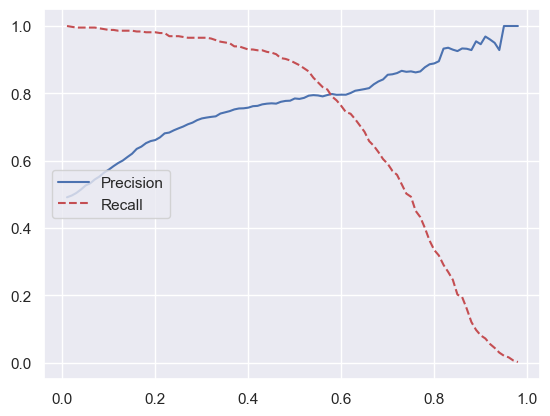

In [93]:
plt.plot(thresholds_rand, precisions_rand[:-1], 'b-', label='Precision')
plt.plot(thresholds_rand, recall_rand[:-1], 'r--', label='Recall')
plt.legend(loc='center left')
plt.show()

In [94]:
i = np.argmax(recall_rand < 0.9)

In [95]:
recall_rand[i]

0.8976744186046511

In [96]:
recall_rand[i-1]

0.9023255813953488

In [97]:
i

48

In [98]:
threshold_90_recall = thresholds_rand[i - 1]

In [99]:
y_preds_90_recall = y_scores_rand >= threshold_90_recall

In [100]:
precision_score(y_train, y_preds_90_recall)

0.7775551102204409

In [101]:
recall_score(y_train, y_preds_90_recall)

0.9023255813953488

In [102]:
y_pred_actual_random_forest = rand_for.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_actual_random_forest)
accuracy

0.8227513227513228

###ROC Curve

In [103]:
fpr_rand, tpr_rand, thresholds_rand = roc_curve(y_train, y_scores_rand)

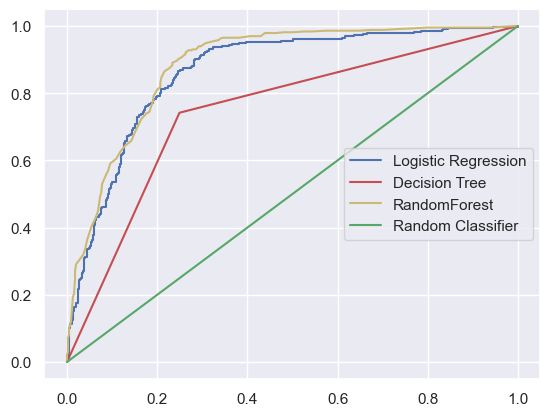

In [104]:
plt.plot(fpr, tpr, 'b-', label='Logistic Regression')
plt.plot(fpr_dec, tpr_dec, 'r-', label='Decision Tree')
plt.plot(fpr_rand, tpr_rand, 'y-', label='RandomForest')
plt.plot([0, 1], [0, 1], 'g-', label='Random Classifier')
plt.legend(loc='center right')
plt.show()

In [105]:
roc_auc_score(y_train,  y_scores_rand)

0.8853343346972601

### Prediction Accuracy

In [120]:
y_pred_actual_random_forest = rand_for.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_actual_random_forest)
accuracy

0.8227513227513228

In [121]:
a = X_test[5,:]

In [122]:
y_test[5]

1

In [123]:
rand_for.predict(a.reshape(1,-1))

array([0])

In [124]:
import pickle

In [125]:
pickle.dump(rand_for, open('rand_for.model', 'wb'))

In [126]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [127]:
base_estimator = DecisionTreeClassifier(max_depth=1)  # weak classifier
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50)

# Train AdaBoost model
ada_boost.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred = ada_boost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Accuracy:", accuracy)

AdaBoost Accuracy: 0.8121693121693122


In [128]:
from sklearn.ensemble import GradientBoostingClassifier

In [129]:
gradient_boost = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1)

# Train Gradient Boosting model
gradient_boost.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred = gradient_boost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Accuracy:", accuracy)

Gradient Boosting Accuracy: 0.8148148148148148


In [131]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [132]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


params = {
    'objective': 'multi:softmax',  
    'num_class': 3,  
    'max_depth': 3,  
    'eta': 0.1, 
    'eval_metric': 'merror'  
}


xgb_model = xgb.train(params, dtrain, num_boost_round=50)


y_pred = xgb_model.predict(dtest)
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 0.8201058201058201
